*Fraud Detection**
​
Our Tasks
- Explore the dataset/Visualize
- Decide which features are important
- Perform Machine Learning
- Test the model on the testing set
​
​
For the homework3
- Create own visualization
- Try out different testing sizes
- Try another model

In [52]:
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

from sklearn import svm

In [53]:
!pip install plotly

In [54]:
datafile = "creditcard.csv"

df = pd.read_csv(datafile, low_memory=False)
df = df.sample(frac=1) .reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,34122.0,1.414564,-1.160909,0.981444,-1.362665,-1.916582,-0.539251,-1.372441,-0.014469,-1.866915,...,0.072359,0.598142,-0.034335,0.548682,0.322347,-0.079374,0.052752,0.022204,23.98,0
1,169315.0,1.122147,-1.854698,-1.081595,0.438031,-0.921602,-0.185125,0.135094,-0.043335,1.147165,...,-0.115503,-1.209051,0.011634,-0.372184,-0.666526,-0.457533,-0.091702,0.022769,451.92,0
2,47994.0,1.118986,0.479308,0.856912,2.516300,-0.309701,-0.282434,-0.041052,0.096344,-0.554325,...,-0.216240,-0.734731,0.232327,0.316259,0.085811,-0.252080,0.001241,0.025630,2.69,0
3,159176.0,-4.369812,-5.917049,-0.168121,-0.154273,2.345278,-2.781302,-3.516068,0.562072,0.321144,...,0.070970,0.249588,-1.373759,0.940174,-2.996548,0.081299,1.144238,-1.181074,43.90,0
4,59569.0,-1.352243,1.040384,1.108420,0.424259,-0.930330,-0.998397,-0.074087,0.670338,-0.527909,...,-0.068741,-0.314852,0.182455,0.988065,-0.064429,0.221439,-0.323831,-0.202071,16.90,0


In [55]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

492
284315


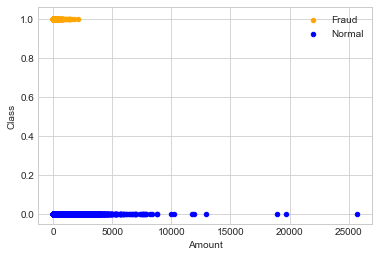

In [56]:
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

## Machine learning

In [57]:
# collect all the columns except for the last one
x = df.iloc[:, :-1]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35) # 35% for testing size

In [58]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print('Score:', logistic.score(X_test, y_test)) # 0.9992576467401664 probably overfiting!

/home/rodrigo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Score: 0.9990068517199523


In [59]:
y_predicted = np.array(logistic.predict(X_test))
print(y_predicted)
print(classification_report(y_test, y_predicted))

[0 0 0 ... 1 0 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99488
           1       0.83      0.62      0.71       195

    accuracy                           1.00     99683
   macro avg       0.91      0.81      0.85     99683
weighted avg       1.00      1.00      1.00     99683



In [22]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.160574e-15,3.852040e-16,-1.421546e-15,2.126483e-15,1.029606e-15,1.502571e-15,-5.450192e-16,1.034382e-16,-2.393711e-15,...,1.447732e-16,-3.560656e-16,2.752224e-16,4.483984e-15,5.141869e-16,1.694732e-15,-3.703272e-16,-1.280320e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


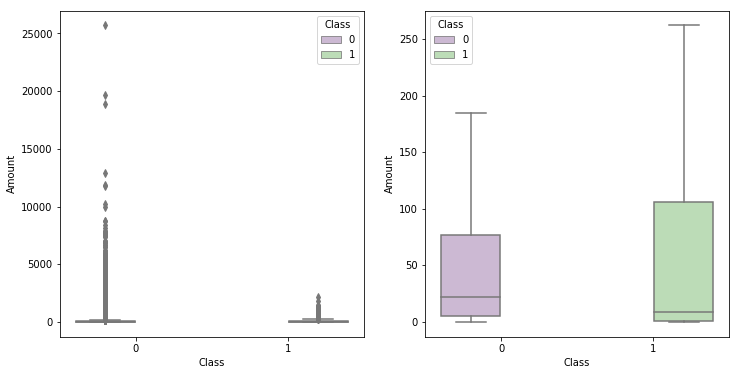

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

In [31]:
# Take a look into amount per class

df_aux = df[['Amount','Class']].copy() # copy dataframe, avoid reference problems
class_fraud_0 = df_aux.loc[df_aux['Class'] == 0]['Amount']
class_normal_1 = df_aux.loc[df_aux['Class'] == 1]['Amount']

print(class_fraud_0.shape)
print(class_normal_1.shape)

(284315,)
(492,)


In [33]:
print(class_fraud_0.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [34]:
print(class_normal_1.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


## Heatmap 

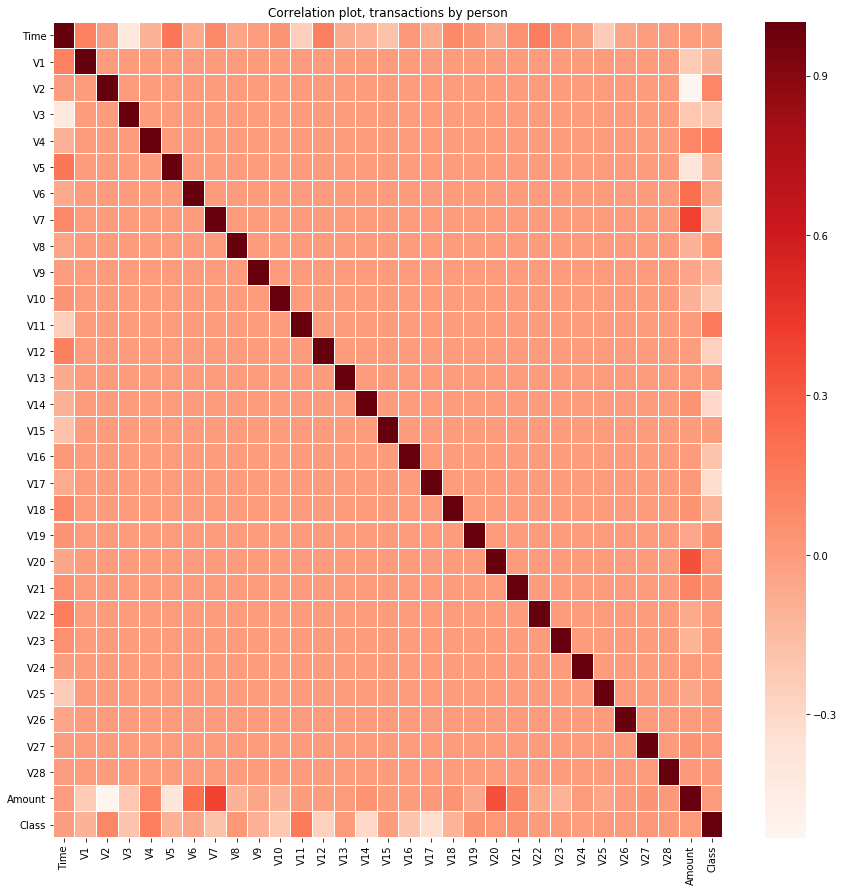

In [45]:
plt.figure(figsize = (15,15))
plt.title('Correlation plot, transactions by person')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

### Correlated values

/home/rodrigo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



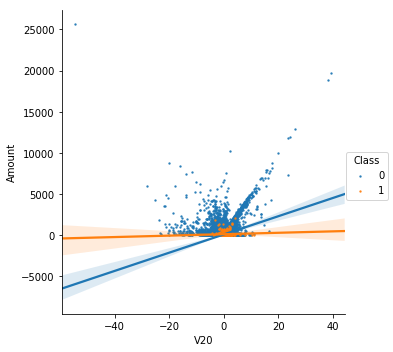

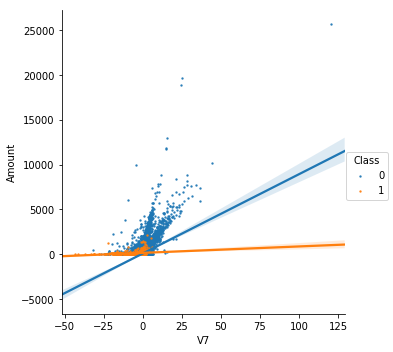

In [39]:
# Plot direct correlated values, V7 and V20 (the more reddish data)
s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

The V7 and V20 are correlates, the derivative from class 0 is posivite while class 1 has also a positive derivaive, but smaller

## Inverse correlated values

/home/rodrigo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



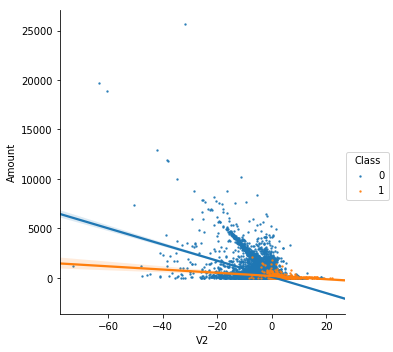

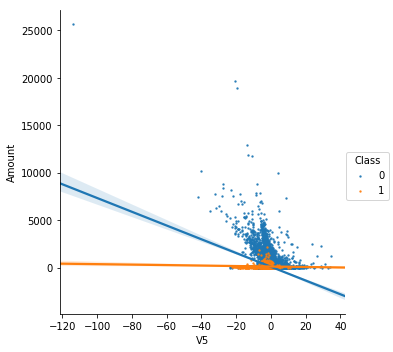

In [47]:
s = sns.lmplot(x='V2', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

The two values V2 and V5 are inverse correlated due derivative from curve Class 0 be negative and Class 1 too.


### Density plot

<Figure size 432x288 with 0 Axes>

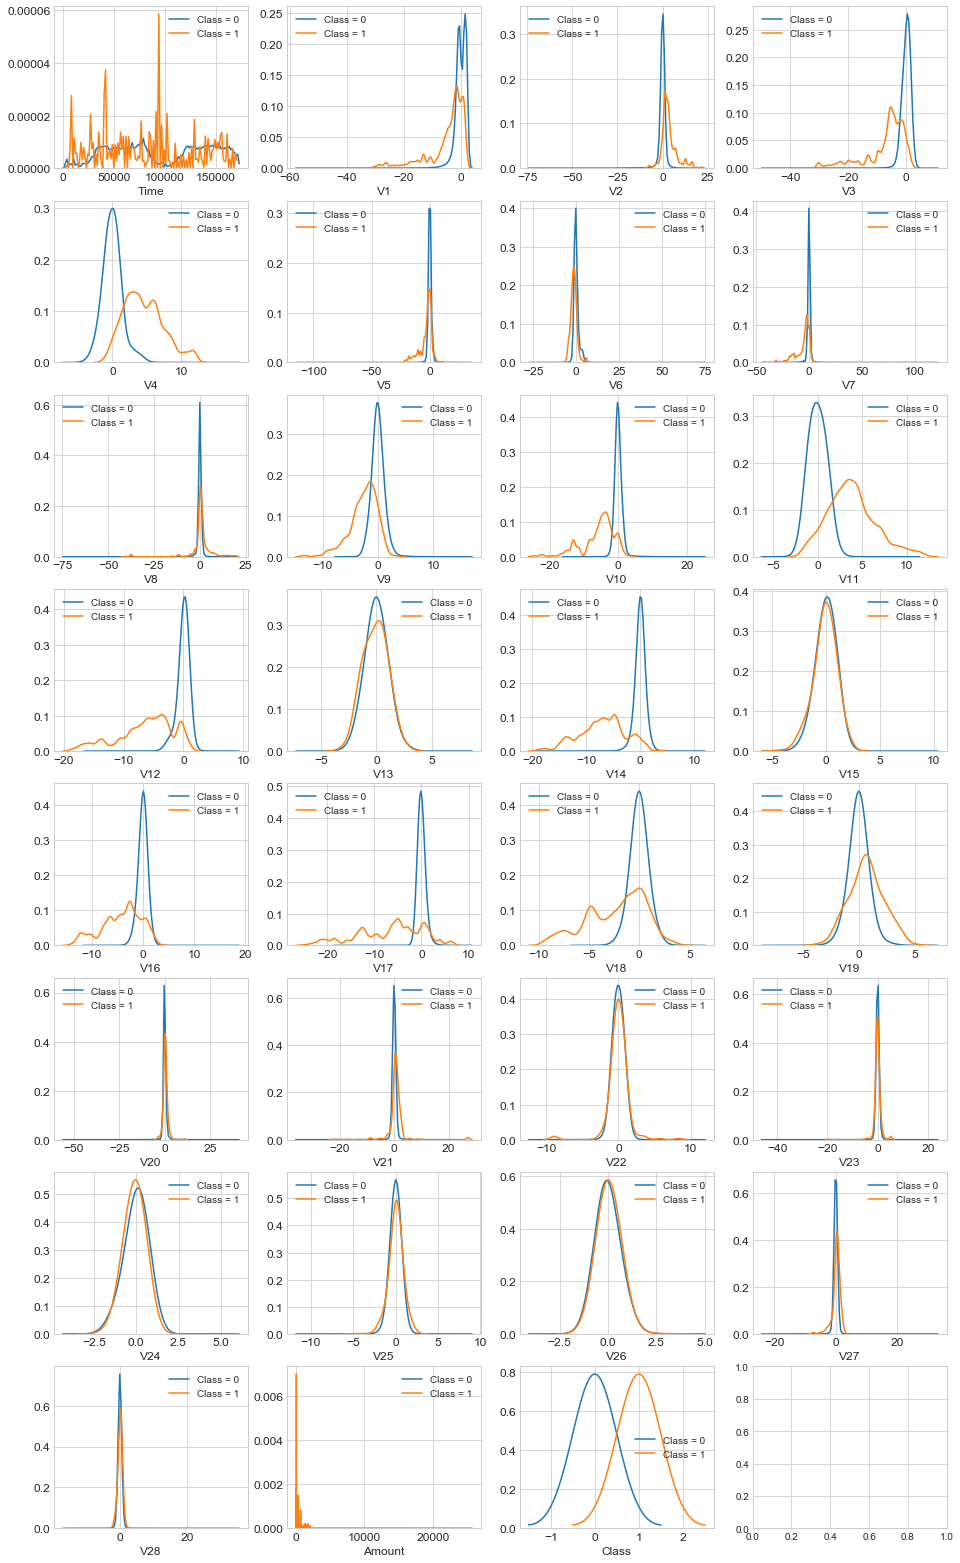

In [50]:

var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();


From graphs:

V12, V14, V18 are a bit separated in terms of class values 0 and 1
V4 and V11 are very diferent 
V1, V2 and V3 have a specific profile
V25, V26 and V28 have the same profile
